Cette partie est une application du début du livre de Christopher M.Bishop "Pattern Recognition and Machine Learning  dans laquelle j'essaie de mettre en pratique ce que j'ai lu. 

En commmencant par du curve fitting sur les données météorologiques à une heure donnée à un lieu donné. Cependant contrairement à précedement, il nous faut utiliser au moins deux années distinctes pour un même endroit pour bien capter la presque-périodicité des données. Sinon un polynome de degré 2 approche très très bien les données sur une année, mais ne permettrait pas de comprende les tendances entre années 

I) Polynomial Curve Fitting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from scipy.optimize import minimize
from scipy.optimize import curve_fit

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [5]:
température = pd.read_csv("température4.csv")

In [6]:
#on renomme la colonne température du fichier des relevés pour distinguer températures réelles des températures prédites 
new_name1 = {'temperature_2m_x' :  'temperature_2m', 'temperature_2m_y' : 'temperature_reelle_2m'}
température=température.rename(columns=new_name1)

In [7]:
#ajout des colonnes erreur et erreur absolue. Cette dernière est importante car le modèle se trompe presque autant en positif qu'en négatif, ainsi la moyenne de l'erreur est presque nuelle, ce qui ne nous renseigne pas beaucoup 
température["error"]=température["temperature_2m"]-température["temperature_reelle_2m"]
température["absolute_error"]=abs(température["error"])

In [8]:
température['date'] = pd.to_datetime(température['date']) # pour pouvoir facilement selectionner la date

In [9]:
Tagsdorf  = température.head(365*24-5)  # commune de Tagsdorf dans le haut Rhin 
Tagsdorf_23h = Tagsdorf[Tagsdorf["date"].dt.hour == 23]



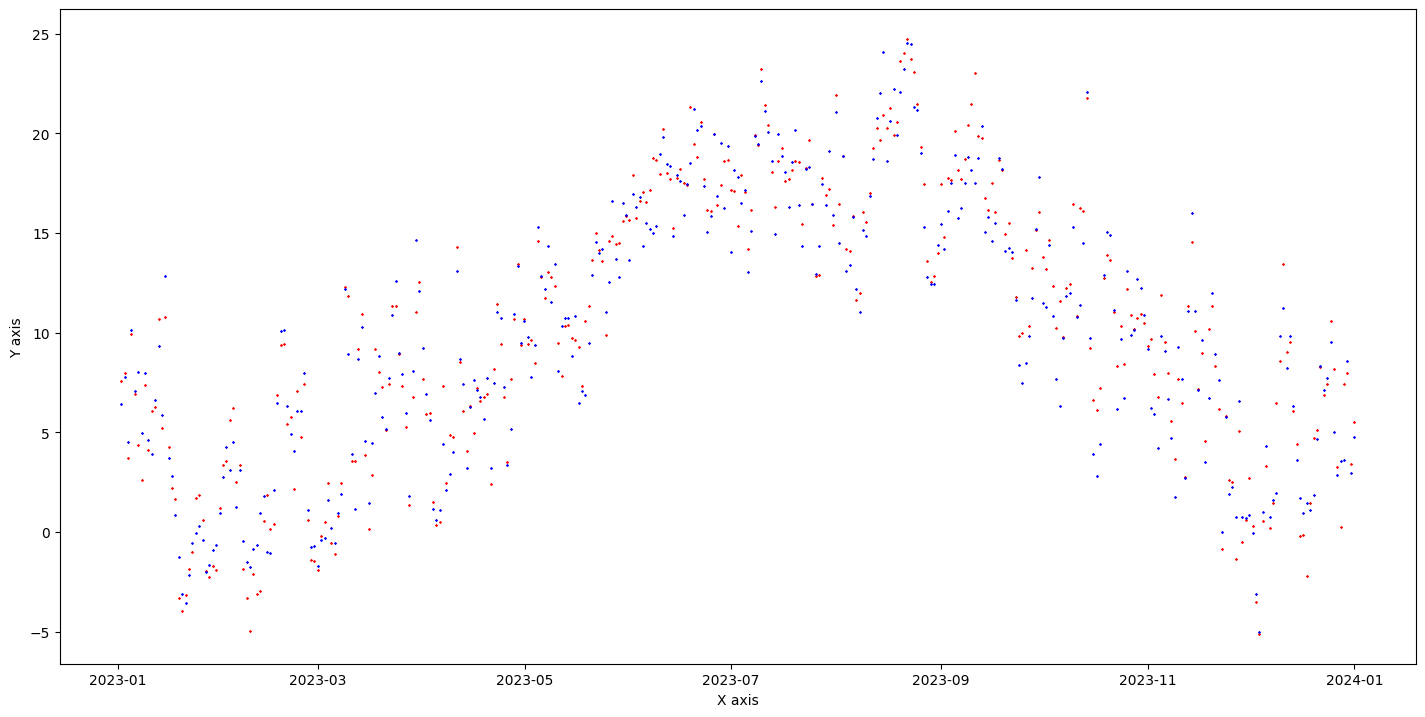

In [11]:
x = Tagsdorf_23h["date"]
y1 = Tagsdorf_23h["temperature_reelle_2m"]
y2 = Tagsdorf_23h["temperature_2m"]

fig = plt.figure(figsize=(17.5,8.5))

# Scatter plot the points
plt.scatter(x, y1, c='r', marker='X', s=0.5) # température réelle 
plt.scatter(x, y2, c='b', marker='X', s=0.5)  # température prédite par le modèle 

# Set labels
plt.xlabel('X axis')
plt.ylabel('Y axis')


plt.show()

Utilisation de la fonction curve_fit de scipy :

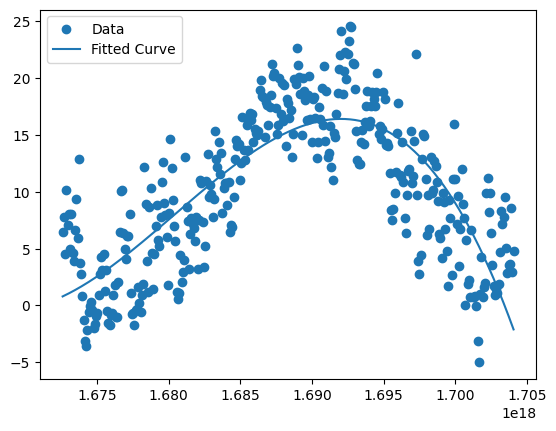

In [14]:
time = Tagsdorf_23h["date"].values.astype(float)
real_values = Tagsdorf_23h["temperature_reelle_2m"].values
values=Tagsdorf_23h["temperature_2m"].values

def polynomial(x, a, b, c, d):
    return a * x**4 + b * x**3 + c*x**2 + d*x 


# Fit the curve
popt, pcov = curve_fit(polynomial, time, values )

# Plot the data and the fitted curve

plt.scatter(time, values, label='Data')
plt.plot(time, polynomial(time, *popt), label='Fitted Curve')
plt.legend()
plt.show()

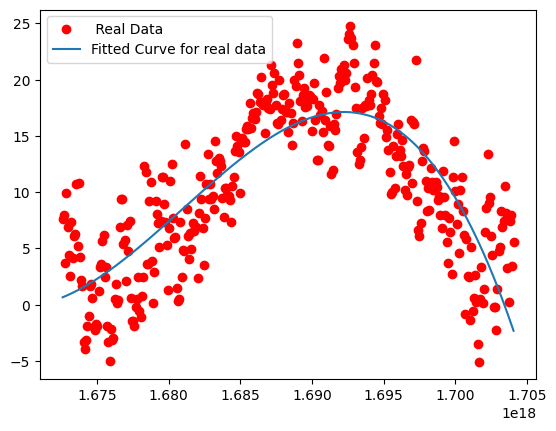

In [15]:
time = Tagsdorf_23h["date"].values.astype(float)
real_values = Tagsdorf_23h["temperature_reelle_2m"].values

def polynomial(x, a, b, c, d):
    return a * x**4 + b * x**3 + c*x**2 + d*x 

# Fit the curve
popt, pcov = curve_fit(polynomial, time, real_values )

# Plot the data and the fitted curve

plt.scatter(time, real_values, label=' Real Data' , c="r")
plt.plot(time, polynomial(time, *popt), label='Fitted Curve for real data')
plt.legend()
plt.show()


Comparaison des fonctions polynomiales approchant les données prédites (en marron) et réelle (en bleu)

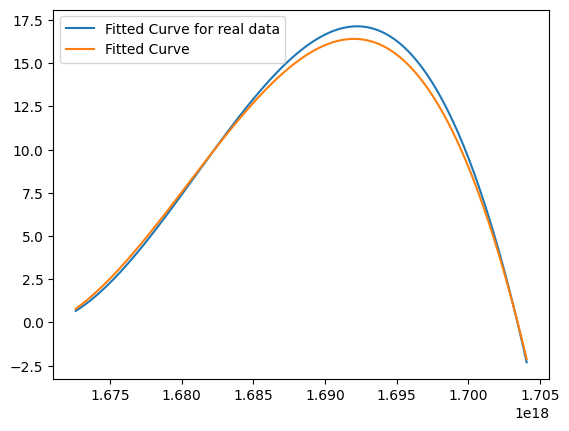

In [16]:
popt1, pcov1 = curve_fit(polynomial, time, real_values )
popt, pcov = curve_fit(polynomial, time, values )

plt.plot(time, polynomial(time, *popt1), label='Fitted Curve for real data')
plt.plot(time, polynomial(time, *popt), label='Fitted Curve')
plt.legend()
plt.show()

Ainsi on voit que même si les écarts sont importants point par point, lorsque l'on approxime les données par des fonctions polynomiales, les écarts disparaissent grandement, à part en été, où la courbe de prédiction est en dessous de celle des données réelles.